<a href="https://colab.research.google.com/github/20xygen/Python-Lab-2-semester-/blob/main/lab_work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [293]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [294]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Офтальмолог",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()
for vac in data['items']:
  print(str(vac)[:100], '...')

{'id': '97652710', 'premium': False, 'name': 'Администратор ветеринарной клиники', 'department': Non ...
{'id': '98940739', 'premium': False, 'name': 'Врач-офтальмолог', 'department': None, 'has_test': Fal ...
{'id': '98776545', 'premium': False, 'name': 'Врач-офтальмолог', 'department': None, 'has_test': Fal ...
{'id': '98825381', 'premium': False, 'name': 'Врач-офтальмолог', 'department': None, 'has_test': Fal ...
{'id': '99032249', 'premium': False, 'name': 'Менеджер по развитию бизнеса / Региональный представит ...
{'id': '98804521', 'premium': False, 'name': 'Врач-офтальмолог/офтальмохирург', 'department': None,  ...
{'id': '97494188', 'premium': False, 'name': 'Администратор ветеринарной клиники', 'department': Non ...
{'id': '93883777', 'premium': False, 'name': 'Регистратор отдела офтальмологии', 'department': None, ...
{'id': '95533695', 'premium': False, 'name': 'Водитель с личным легковым автомобилем', 'department': ...
{'id': '99021342', 'premium': False, 'name': 'Администр

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [295]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [296]:
all_vacs = {'Боксер': [], 'Блоггер': [], 'Режиссер': [], 'Сыровар': [], 'Стьюардесса': []}

for name in all_vacs.keys():
  print(f'{name}:\n')
  params = {
      'text': name,
      'area': 1,
      'page': 0,
      'per_page': 50
  }
  sleep(0.5)

  data = requests.get(URL, params).json()
  pa = data['pages']
  print(f"Found {pa} pages. Here is first 5 vacancies:\n")
  for vac in data['items'][:5]:
    print(str(vac)[:100], '...')

  for i in range(pa - 1):
    params['page'] = i
    data = requests.get(URL, params).json()
    all_vacs[name] += data['items']
    sleep(0.5)

  print(f'\nLast page len is ', end='')
  params['page'] = data['pages'] - 1
  data = requests.get(URL, params).json()
  la = len(data['items'])
  print(str(la)[:100], '...')
  all_vacs[name] += data['items']
  sleep(0.5)

  print('\n\n')

Боксер:

Found 1 pages. Here is first 5 vacancies:

{'id': '98894493', 'premium': False, 'name': 'Водитель на автомобиль компании (категория В)', 'depar ...
{'id': '98802079', 'premium': False, 'name': 'Водитель-экспедитор (на своем автомобиле)', 'departmen ...
{'id': '95819416', 'premium': False, 'name': 'Швея', 'department': None, 'has_test': False, 'respons ...
{'id': '98897351', 'premium': False, 'name': 'Водитель-экспедитор', 'department': None, 'has_test':  ...
{'id': '98897752', 'premium': False, 'name': 'Начинающий водитель на доставку концелярии (подработка ...

Last page len is 27 ...



Блоггер:

Found 2 pages. Here is first 5 vacancies:

{'id': '92333368', 'premium': False, 'name': 'Продавец-кассир в магазин SuperStep', 'department': No ...
{'id': '91335739', 'premium': False, 'name': 'Продавец-консультант во флагман SuperStep', 'departmen ...
{'id': '98273593', 'premium': False, 'name': 'Руководитель отдела внешних коммуникаций', 'department ...
{'id': '98762650', 'premium

(1 балл) Посчитайте сколько всего найдено вакансий:

In [297]:
print("Vacancy amount:\n")
amount = 0
for name, its in all_vacs.items():
  print(f'{name}: {len(its)}')
  amount += len(its)

Vacancy amount:

Боксер: 27
Блоггер: 92
Режиссер: 155
Сыровар: 6
Стьюардесса: 71


(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [298]:
from typing import List, Optional

class Company:
  name: Optional[str]
  lat: Optional[float]
  lng: Optional[float]
  salary: Optional[int]
  job: str

  def __init__(self, n: Optional[str], la: Optional[float], ln: Optional[float], s: Optional[int], j: str):
    self.name = n
    self.lat = la
    self.lng = ln
    self.salary = s
    self.job = j

  def __lt__(self, other):
    return self.name < other.name

  def __str__(self):
    return f'{self.name} - {self.salary}руб [{self.lat}, {self.lng}], {self.job}'

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [299]:
raw_companies = [Company(None if vac['employer'] is None else vac['employer']['name'],
                         None if vac['address'] is None else vac['address']['lat'],
                         None if vac['address'] is None else vac['address']['lng'],
                         None if vac['salary'] is None else vac['salary']['from'],
                         cat)
             for cat, lst in all_vacs.items()
             for vac in lst]

print(f"All companies ({len(raw_companies)}): ", *raw_companies[:3], '...')
raw_companies.sort()

companies = [raw_companies[0]]
for comp in raw_companies:
  if comp.name != companies[-1].name and comp.name is not None:
    companies.append(comp)

print(f"Unique companies ({len(companies)}): ", *companies[:3], '...')

All companies (351):  ИРП - 70000руб [55.882969, 37.495797], Боксер Интернет магазин Mebelion.ru (Мебелион.Ру) - 220000руб [55.646817, 37.63385], Боксер Текса - Noneруб [55.803853, 37.607412], Боксер ...
Unique companies (246):  1shot.club - 34700руб [55.644237, 37.526519], Блоггер 1С Гейм Студиос - Noneруб [None, None], Режиссер 2MOOD - Noneруб [55.746106, 37.663404], Блоггер ...


(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [300]:
compamies_cords = [comp for comp in companies if comp.lat is not None and comp.lng is not None]
print(f'{len(compamies_cords)} companies have coordinates')

154 companies have coordinates


(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [301]:
kremlin = [55.752507, 37.623150]
building_in_MRR = [55.753195, 37.797002]

def distance(c1: List[float], c2: list[float]):
  return ((c1[0] - c2[0]) ** 2 + (c1[1] - c2[1]) ** 2) ** 0.5

radius = distance(kremlin, building_in_MRR)
companies_MRR = [comp for comp in compamies_cords if distance([comp.lat, comp.lng], kremlin) <= radius]
print(f'{len(companies_MRR)} companies are (roughly) inside MRR')

124 companies are (roughly) inside MRR


(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

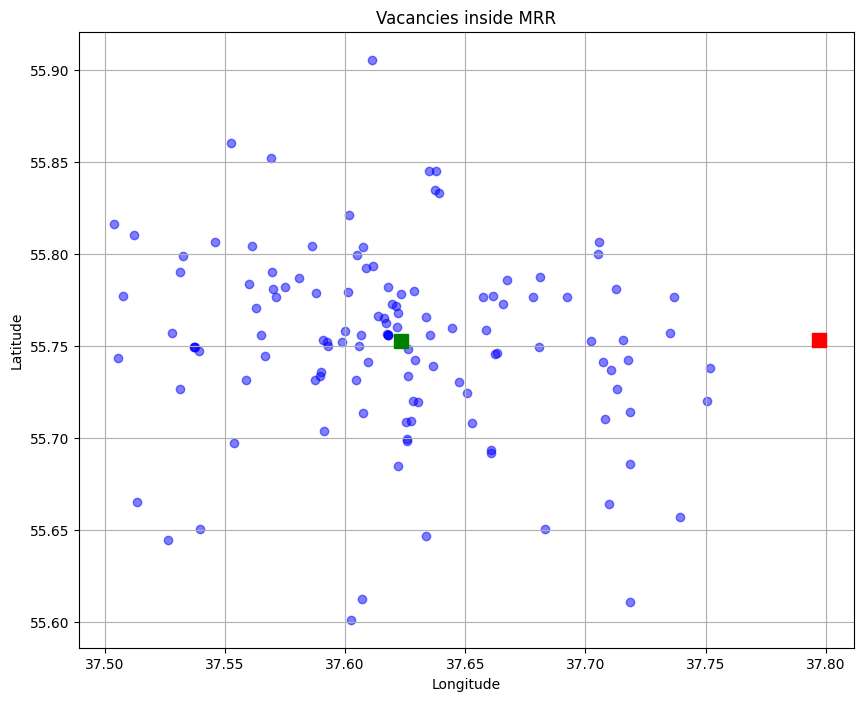

In [302]:
lats = [comp.lat for comp in companies_MRR]
lons = [comp.lng for comp in companies_MRR]
plt.figure(figsize=(10, 8))
plt.scatter(lons, lats, alpha=0.5, marker='o', color='blue')
plt.plot(building_in_MRR[1], building_in_MRR[0], marker='s', color='red', markersize=10)
plt.plot(kremlin[1], kremlin[0], marker='s', color='green', markersize=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Vacancies inside MRR')
plt.grid(True)
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве):

In [303]:
import plotly.graph_objects as go

colors = {
    'Боксер': 'red',
    'Блоггер': 'green',
    'Режиссер': 'blue',
    'Сыровар': 'purple',
    'Стьюардесса': 'orange'
}

texts = [str(vac) for vac in companies_MRR]

moscow_center = {"lat": kremlin[0], "lon": kremlin[1]}

fig = go.Figure(go.Scattermapbox(
    lat=lats,
    lon=lons,
    mode='markers',
    marker=dict(
        size=9,
        color=[colors[vac.job] for vac in companies_MRR],
        opacity=0.6
    ),
    text=texts
))

fig.update_layout(
    mapbox_style="carto-positron",
    mapbox_center={"lat": moscow_center["lat"], "lon": moscow_center["lon"]},
    mapbox_zoom=10
)

fig.show()

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

В основном компании, имеющие вакансии по заданным категориям, расположены внутри ТТК. Распределение относительно категорий приблизительно равномерное. Зарплаты компаний близких к центру москвы - выше. Из 350 вакансий только 250 представлены различными компаниями (100 повторов). Вакансий режиссера в нашей выборки больше всего.

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [304]:
!gdown 10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8

Downloading...
From: https://drive.google.com/uc?id=10OJ30qlkE-7zK4JuVTDMY3U4nRB4tu_8
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 93.4MB/s]


Создадим DataFrame:

In [305]:
import pandas as pd

diamonds = pd.read_csv("diamonds.csv")
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,...,8.66,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,...,5.71,TK,XTK,unknown,NaN,Green,unknown,NaN,Fancy Light,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,...,10.20,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,...,3.47,XTN,VTK,unknown,Faint,Red,unknown,unknown,Fancy,1350000


(0.5 балла) Выведете первые 5 строк датасета:

In [306]:
# print(diamonds.head())
diamonds.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [307]:
amount = diamonds.shape[0]
print(amount, 'diamonds in dataset')

219703 diamonds in dataset


(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [308]:
max_price = diamonds['total_sales_price'].max()
min_price = diamonds['total_sales_price'].min()

print("Max price:", max_price)
print("Min price:", min_price)

Max price: 1449881
Min price: 200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [309]:
missing_values = (diamonds.eq("unknown") | diamonds.eq("None")).sum()
print(missing_values)
print("\nTotal:", missing_values.sum())

Unnamed: 0                          0
cut                                 0
color                            9162
clarity                             0
carat_weight                        0
cut_quality                     60607
lab                                 0
symmetry                            0
polish                              0
eye_clean                      156916
culet_size                      85740
culet_condition                204384
depth_percent                       0
table_percent                       0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                      83432
girdle_max                      84295
fluor_color                    203977
fluor_intensity                   128
fancy_color_dominant_color     210539
fancy_color_secondary_color    218641
fancy_color_overtone           217665
fancy_color_intensity          210541
total_sales_price                   0
dtype: int64

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [310]:
columns_missing = missing_values[missing_values > 0]

print("Columns with missing values: ", *columns_missing.index.tolist())
print("\nAs list:\n", columns_missing, sep='\n')

Columns with missing values:  color cut_quality eye_clean culet_size culet_condition girdle_min girdle_max fluor_color fluor_intensity fancy_color_dominant_color fancy_color_secondary_color fancy_color_overtone fancy_color_intensity

As list:

color                            9162
cut_quality                     60607
eye_clean                      156916
culet_size                      85740
culet_condition                204384
girdle_min                      83432
girdle_max                      84295
fluor_color                    203977
fluor_intensity                   128
fancy_color_dominant_color     210539
fancy_color_secondary_color    218641
fancy_color_overtone           217665
fancy_color_intensity          210541
dtype: int64


В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными.

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [311]:
bad_columns = diamonds.filter(regex='^fancy_color_|^fluor_', axis=1)

num_bad_columns = bad_columns.shape[1]

print("Columns, starting with 'fancy_color_' or 'fluor_':", num_bad_columns)
bad_columns


Columns, starting with 'fancy_color_' or 'fluor_': 6


,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity
0,unknown,NaN,unknown,unknown,unknown,unknown
1,unknown,NaN,unknown,unknown,unknown,unknown
2,unknown,NaN,unknown,unknown,unknown,unknown
3,unknown,NaN,unknown,unknown,unknown,unknown
4,unknown,NaN,unknown,unknown,unknown,unknown
...,...,...,...,...,...,...
219698,unknown,NaN,unknown,unknown,unknown,unknown
219699,unknown,NaN,Green,unknown,NaN,Fancy Light
219700,unknown,NaN,unknown,unknown,unknown,unknown
219701,unknown,Faint,Red,unknown,unknown,Fancy


2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках:

In [312]:
num_informative_values = bad_columns.applymap(lambda x: 1 if x not in ['None', 'unknown'] else 0).sum().sum()

print("Amount of informative values of columns, starting with 'fancy_color_' or 'fluor_ columns':", num_informative_values)


Amount of informative values of columns, starting with 'fancy_color_' or 'fluor_ columns': 256727


3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [313]:
diamonds.drop(columns=diamonds.columns[diamonds.columns.str.startswith('fancy_color_') | diamonds.columns.str.startswith('fluor_')], inplace=True)
diamonds.to_csv("modified_diamonds.csv", index=False)
diamonds

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,N,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,N,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,unknown,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,N,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,unknown,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,N,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,N,unknown,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [314]:
filtered_columns_culet = diamonds.filter(regex='^culet_', axis=1)

num_informative_values_culet = filtered_columns_culet.applymap(lambda x: 0 if x in ['None', 'unknown'] else 1).sum().sum()
num_uninformative_values_culet = filtered_columns_culet.applymap(lambda x: 1 if x in ['None', 'unknown'] else 0).sum().sum()

print("Amount of informative values of columns, starting with 'culet_':", num_informative_values_culet)
print("Amount of non-informative values of columns, starting with 'culet_':", num_uninformative_values_culet)

diamonds.drop(columns=diamonds.columns[diamonds.columns.str.startswith('culet_')], inplace=True)
diamonds.to_csv("modified_diamonds.csv", index=False)
diamonds


Amount of informative values of columns, starting with 'culet_': 149282
Amount of non-informative values of columns, starting with 'culet_': 290124


,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.9,59.0,2.84,2.89,1.78,STK,STK,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.0,59.0,2.86,2.88,1.78,M,STK,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219699,219700,Radiant,unknown,VS2,5.17,unknown,GIA,Very Good,Very Good,unknown,64.8,65.0,11.55,8.81,5.71,TK,XTK,1292500
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496
219701,219702,Princess,unknown,SI2,0.90,unknown,GIA,Good,Good,unknown,70.8,72.0,5.22,4.90,3.47,XTN,VTK,1350000


(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [315]:
total_price_dollars = diamonds['total_sales_price'].sum()
total_price_thousands = total_price_dollars / 1000

print(f"Total price is {int(total_price_thousands)} thousand dollars")
print(f"It is about {round(total_price_thousands / 1000000, 1)} billions!")


Total price is 1517721 thousand dollars
It is about 1.5 billions!


Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [316]:
even_index_rows = diamonds.iloc[::2]
even_index_rows

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [317]:
six_index_rows = diamonds.iloc[::6]
six_index_rows

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [318]:
categorical_data = diamonds.select_dtypes(include='object')
categorical_data

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на `1тот столбец, только транспонированный, и выведите полученную матрицу:

In [319]:
import numpy as np

price_column = diamonds['total_sales_price'].values
price_column

# product_matrix = np.dot(price_column.reshape(-1, 1), price_column.reshape(1, -1))
# product_matrix
# # too complicated calclations
# # let's get line * column:

print(sum([i * i for i in price_column]))

158540672665477


### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

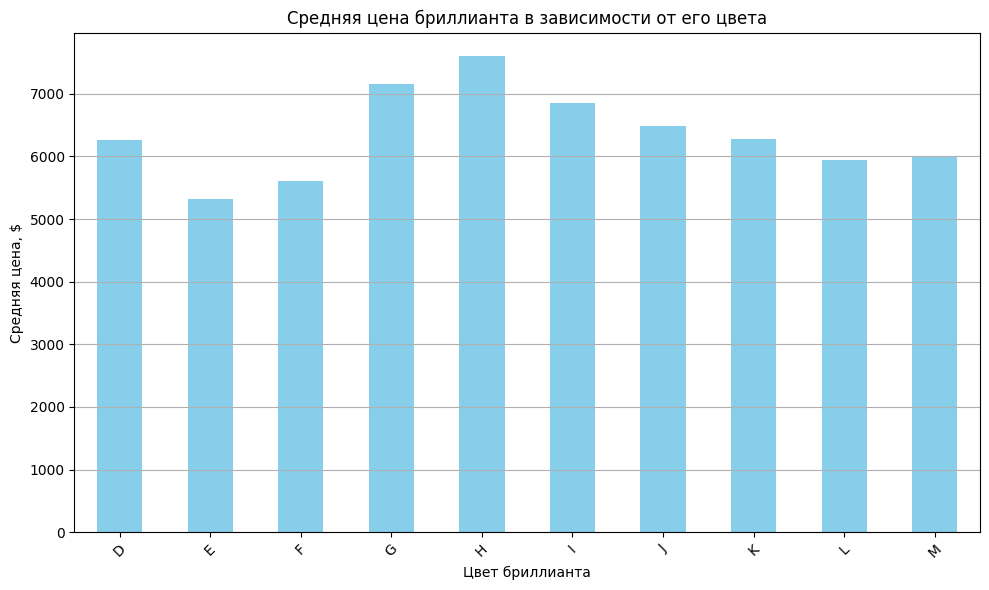

In [320]:
import matplotlib.pyplot as plt

cleaned_data = diamonds.dropna(subset=['color', 'total_sales_price'])

color_price_mean = cleaned_data.groupby('color')['total_sales_price'].mean()
color_price_mean.drop(index='unknown', inplace=True)
# Diamonds with unknown color are too expensive

plt.figure(figsize=(10, 6))
color_price_mean.plot(kind='bar', color='skyblue')
plt.title('Средняя цена бриллианта в зависимости от его цвета')
plt.xlabel('Цвет бриллианта')
plt.ylabel('Средняя цена, $')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

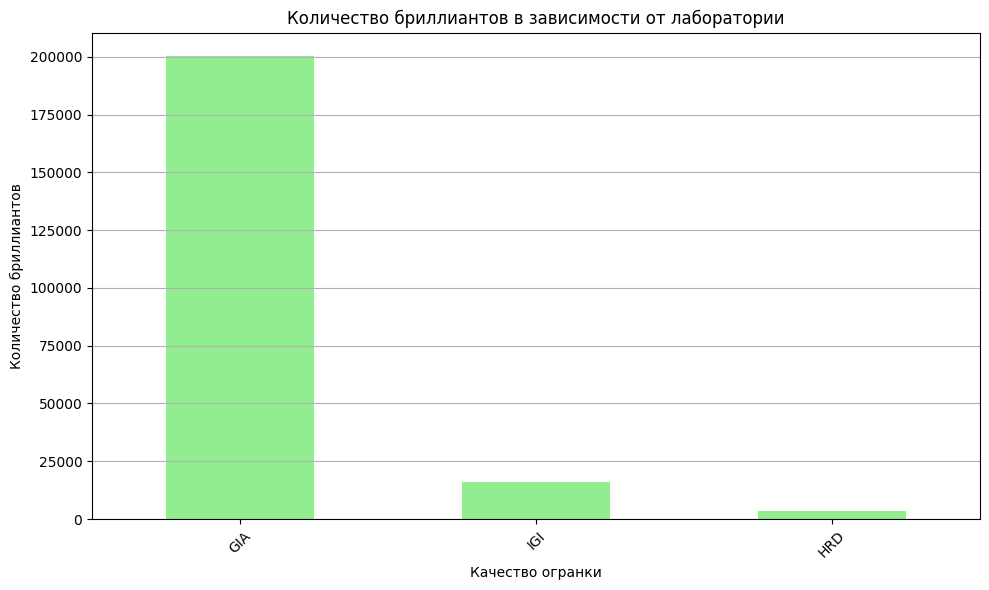

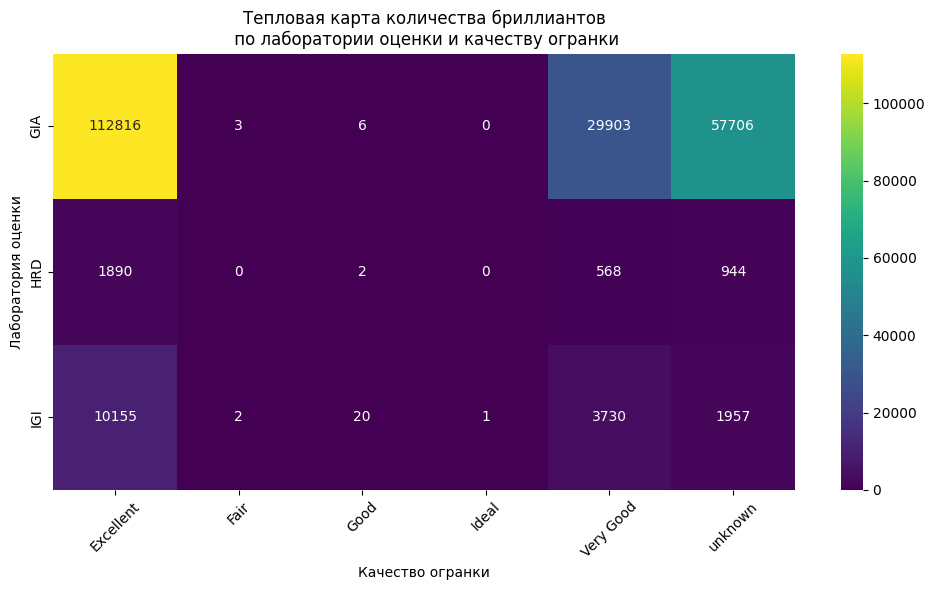

In [321]:
cut_quality_counts = diamonds['lab'].value_counts()

plt.figure(figsize=(10, 6))
cut_quality_counts.plot(kind='bar', color='lightgreen')
plt.title('Количество бриллиантов в зависимости от лаборатории')
plt.xlabel('Качество огранки')
plt.ylabel('Количество бриллиантов')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

import seaborn as sns

cross_table = pd.crosstab(diamonds['lab'], diamonds['cut_quality'])

plt.figure(figsize=(10, 6))
sns.heatmap(cross_table, cmap='viridis', annot=True, fmt='d')
plt.title('Тепловая карта количества бриллиантов\n по лаборатории оценки и качеству огранки')
plt.xlabel('Качество огранки')
plt.ylabel('Лаборатория оценки')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

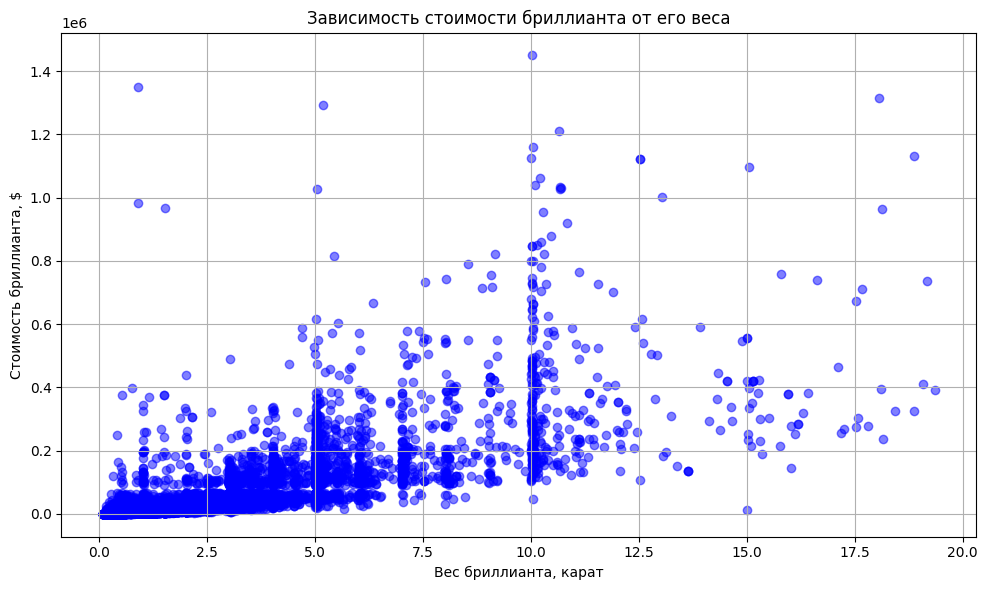

In [322]:
plt.figure(figsize=(10, 6))
plt.scatter(diamonds['carat_weight'], diamonds['total_sales_price'], color='blue', alpha=0.5)
plt.title('Зависимость стоимости бриллианта от его веса')
plt.xlabel('Вес бриллианта, карат')
plt.ylabel('Стоимость бриллианта, $')
plt.grid(True)
plt.tight_layout()
plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

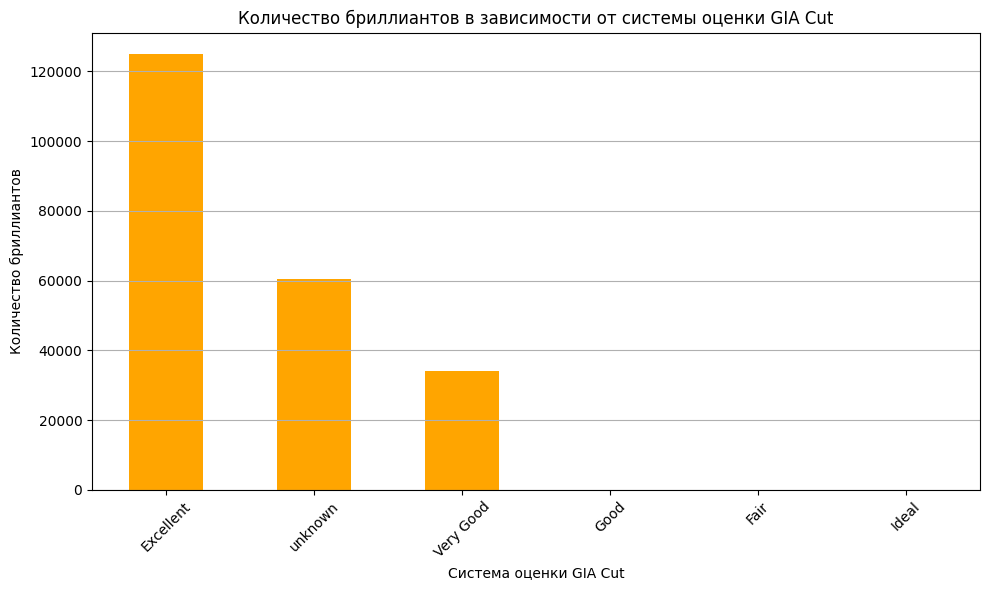

In [323]:
cut_counts = diamonds['cut_quality'].value_counts()

plt.figure(figsize=(10, 6))
cut_counts.plot(kind='bar', color='orange')
plt.title('Количество бриллиантов в зависимости от системы оценки GIA Cut')
plt.xlabel('Система оценки GIA Cut')
plt.ylabel('Количество бриллиантов')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

В случае, если цвет бриллианта определен (не unknown), средняя цена примерно одинаковая. В датасете больше всего бриллиантов, оцененных лабораторией GIA. Притом бриллиантов с оценкой Good, Fair и Unknown очень мало. На графике цена-вес прослеживается линейная прямая зависимость.

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно:
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк:

In [324]:
diamonds_subset = diamonds.loc[:, ['meas_length', 'meas_width', 'meas_depth', 'total_sales_price']]

print(diamonds_subset.head(10))

   meas_length  meas_width  meas_depth  total_sales_price
0         2.85        2.87        1.79                200
1         2.84        2.89        1.78                200
2         2.88        2.90        1.77                200
3         2.86        2.88        1.78                200
4         2.79        2.83        1.82                200
5         2.95        2.99        1.81                200
6         2.85        2.88        1.84                200
7         2.86        2.89        1.78                200
8         2.89        2.92        1.85                200
9         2.83        2.87        1.80                200


(1 балл) Перемешайте строки в датафрейме случайным образом:

In [325]:
diamonds_subset_shuffled = diamonds_subset.sample(frac=1)
diamonds_subset_shuffled

,meas_length,meas_width,meas_depth,total_sales_price
132220,7.22,4.37,2.51,2986
84150,4.56,4.60,2.86,1238
29614,5.55,3.34,2.01,806
99156,5.31,3.39,2.35,1634
2800,4.19,4.22,2.68,472
...,...,...,...,...
8576,4.19,4.23,2.70,588
190950,7.25,7.31,4.53,10066
74051,6.37,4.01,2.45,1088
167188,6.44,6.49,3.84,5264


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [326]:
diamonds_subset_shuffled['minkowski_sum'] = diamonds_subset_shuffled.apply(lambda row: (row['meas_length']**3 + row['meas_width']**3 + row['meas_depth']**3)**(1/3), axis=1)
diamonds_subset_shuffled

,meas_length,meas_width,meas_depth,total_sales_price,minkowski_sum
132220,7.22,4.37,2.51,2986,7.805922
84150,4.56,4.60,2.86,1238,5.995816
29614,5.55,3.34,2.01,806,6.003093
99156,5.31,3.39,2.35,1634,5.864145
2800,4.19,4.22,2.68,472,5.517414
...,...,...,...,...,...
8576,4.19,4.23,2.70,588,5.528012
190950,7.25,7.31,4.53,10066,9.526815
74051,6.37,4.01,2.45,1088,6.963498
167188,6.44,6.49,3.84,5264,8.420587


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`:

In [327]:
new_dataset = diamonds_subset_shuffled.loc[:, ['minkowski_sum', 'total_sales_price']]
new_dataset

,minkowski_sum,total_sales_price
132220,7.805922,2986
84150,5.995816,1238
29614,6.003093,806
99156,5.864145,1634
2800,5.517414,472
...,...,...
8576,5.528012,588
190950,9.526815,10066
74051,6.963498,1088
167188,8.420587,5264


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [328]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(new_dataset, test_size=0.2, random_state=42)

print("Test data volume:", train_data.shape)
print("Test data volume:", test_data.shape)

Test data volume: (175762, 2)
Test data volume: (43941, 2)


(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

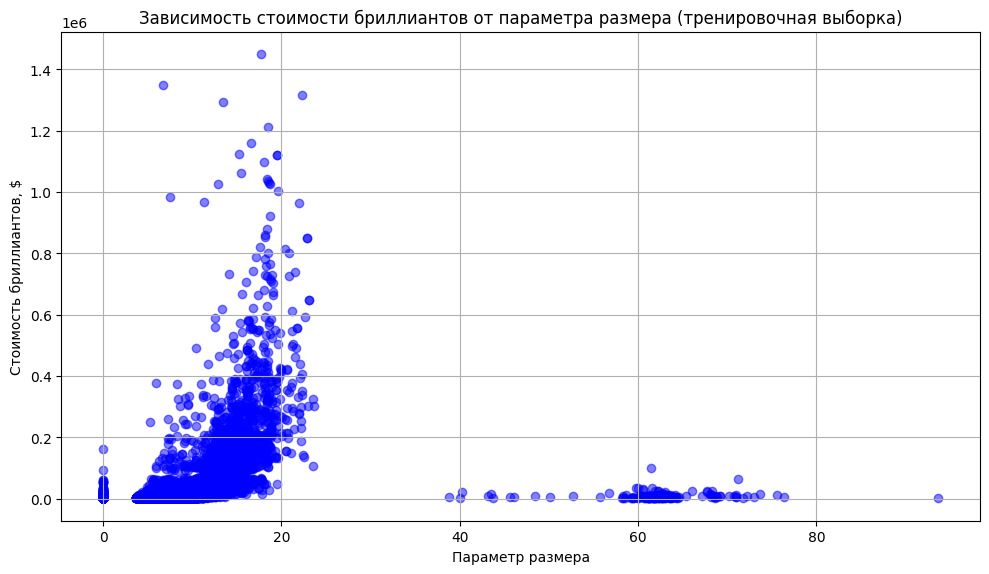

In [329]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data['minkowski_sum'], train_data['total_sales_price'], color='blue', alpha=0.5)
plt.title('Зависимость стоимости бриллиантов от параметра размера (тренировочная выборка)')
plt.xlabel('Параметр размера')
plt.ylabel('Стоимость бриллиантов, $')
plt.grid(True)
plt.tight_layout()
plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

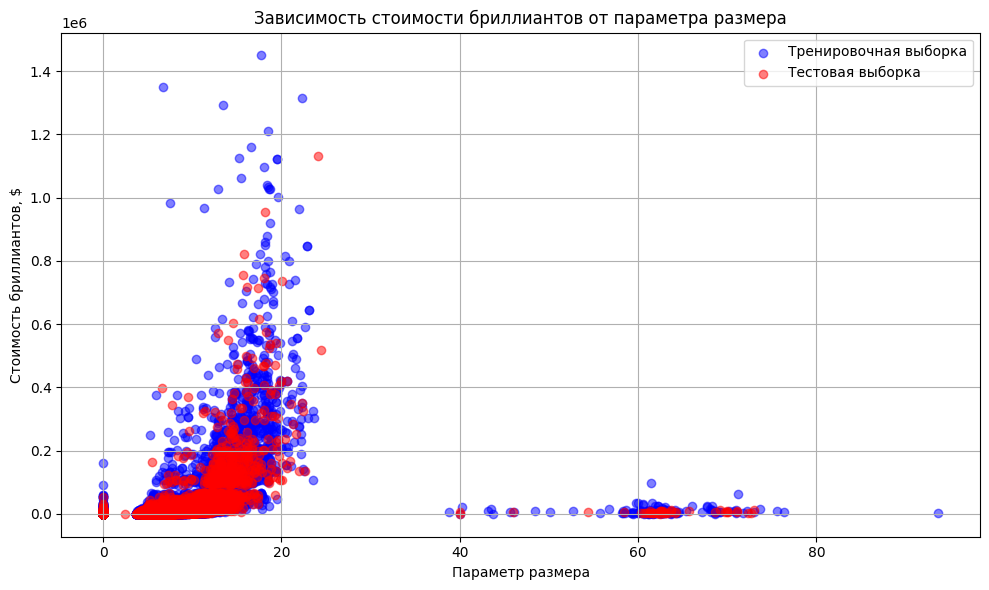

In [330]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data['minkowski_sum'], train_data['total_sales_price'], color='blue', alpha=0.5, label='Тренировочная выборка')
plt.scatter(test_data['minkowski_sum'], test_data['total_sales_price'], color='red', alpha=0.5, label='Тестовая выборка')
plt.title('Зависимость стоимости бриллиантов от параметра размера')
plt.xlabel('Параметр размера')
plt.ylabel('Стоимость бриллиантов, $')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [331]:
# from sklearn.neighbors import NearestNeighbors

# knn = NearestNeighbors(n_neighbors=1)

# knn.fit(train_data[['minkowski_sum', 'total_sales_price']])

# distances, indices = knn.kneighbors(test_data[['minkowski_sum', 'total_sales_price']])

# print("Calculated distances:")
# print(distances)
# print("\nNearest neighbours (their indexes):")
# print(indices)

train_list = [(minkowski_sum, index, price) for index, (minkowski_sum, price) in train_data.iterrows()]
test_list = [(minkowski_sum, index, price) for index, (minkowski_sum, price) in test_data.iterrows()]

print(len([i for i in test_list if i[0] > 0]), '/', len(test_list))

inf = 1000
train_list.append((-1 * inf, -1, -1))
train_list.append((inf, -1, -1))

train_list.sort()
test_list.sort()

neighbors = []
pos = 1

for it in test_list:
  while train_list[pos][0] < it[0]:
    pos += 1
  if abs(train_list[pos][0] - it[0]) < abs(train_list[pos - 1][0] - it[0]):
    neighbors.append(train_list[pos])
  else:
    neighbors.append(train_list[pos - 1])

print(train_list[10000:10005], '...')
print(test_list[10000:10005], '...')
print(neighbors[10000:10005], '...')

43607 / 43941
[(5.175385307413765, 69941, 1050.0), (5.175385307413765, 69985, 1050.0), (5.175385307413765, 71946, 1096.0), (5.175412138599964, 37359, 858.0), (5.175441396222935, 13303, 664.0)] ...
[(5.651548305666258, 47673, 908.0), (5.651548305666258, 50046, 924.0), (5.651548305666258, 59369, 978.0), (5.651598952261703, 60142, 1000.0), (5.651656882171084, 37673, 860.0)] ...
[(5.651548305666258, 4245, 522.0), (5.651548305666258, 4245, 522.0), (5.651548305666258, 4245, 522.0), (5.651598952261703, 60106, 1000.0), (5.651656882171084, 33896, 822.0)] ...


(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [332]:
# test_prices = test_data['total_sales_price'].values
# neighbor_prices = train_data.iloc[indices.flatten()]['total_sales_price'].values

price_difference_percent = [(abs((test_list[i][2] - neighbors[i][2]) / test_list[i][2])) * 100 for i in range(len(neighbors))]

print("Percent differences between test diamond and it's train-neighbour")
print(price_difference_percent[:10], '...')
print("Non-zero differences amount:", len([diff for diff in price_difference_percent if diff != 0]))
print("Average difference:", round(sum(price_difference_percent) / len(price_difference_percent), 1), "%")

Percent differences between test diamond and it's train-neighbour
[0.0, 0.0, 8.108108108108109, 8.108108108108109, 9.734513274336283, 11.304347826086957, 11.304347826086957, 15.0, 31.543624161073826, 36.25] ...
Non-zero differences amount: 43485
Average difference: 61.9 %


**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [333]:
from sklearn.preprocessing import OneHotEncoder

variants = ['cut',	'color',	'clarity',	'cut_quality',	'lab',	'symmetry',	'polish',	'eye_clean',	'girdle_min',	'girdle_max']
# chosen = [variants[0], variants[5]] # MSE (training data): 728834468.88342
chosen = [variants[0], variants[5]]

neural_subset = diamonds.loc[:, [chosen[0], chosen[1], 'total_sales_price']]
neural_subset

# Cleaning:

neural_subset_cleaned = neural_subset.copy()

numerical_cols = neural_subset_cleaned.select_dtypes(include=['float64', 'int64']).columns
neural_subset_cleaned[numerical_cols] = neural_subset_cleaned[numerical_cols].apply(pd.to_numeric, errors='coerce')

quantiles = neural_subset_cleaned[numerical_cols].quantile([0.05, 0.95])
for col in numerical_cols:
    neural_subset_cleaned = neural_subset_cleaned[(neural_subset_cleaned[col] >= quantiles.loc[0.05, col]) & (neural_subset_cleaned[col] <= quantiles.loc[0.95, col])]

neural_subset_cleaned = neural_subset.dropna(subset=['total_sales_price'])

# Encoding:

encoder = OneHotEncoder()

encoded_data = encoder.fit_transform(neural_subset_cleaned[chosen])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(chosen))
encoded_df['total_sales_price'] = neural_subset_cleaned['total_sales_price']

encoded_df

,cut_Asscher,cut_Cushion,cut_Cushion Modified,cut_Emerald,cut_Heart,cut_Marquise,cut_Oval,cut_Pear,cut_Princess,cut_Radiant,cut_Round,symmetry_Excellent,symmetry_Fair,symmetry_Good,symmetry_Poor,symmetry_Very Good,total_sales_price
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,200
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,200
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,200
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,200
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219698,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1210692
219699,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1292500
219700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1315496
219701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1350000


(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [334]:
from sklearn.model_selection import train_test_split

X = encoded_df.drop('total_sales_price', axis=1)
y = encoded_df['total_sales_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=322)
X_train


,cut_Asscher,cut_Cushion,cut_Cushion Modified,cut_Emerald,cut_Heart,cut_Marquise,cut_Oval,cut_Pear,cut_Princess,cut_Radiant,cut_Round,symmetry_Excellent,symmetry_Fair,symmetry_Good,symmetry_Poor,symmetry_Very Good
117741,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
65964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
184202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
146570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
81622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
188441,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
16712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
126549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [335]:
from sklearn.tree import DecisionTreeRegressor

# model = DecisionTreeRegressor(random_state=322)
# default model is too bad

model = DecisionTreeRegressor(max_depth=50, min_samples_leaf=50, random_state=322)

model.fit(X_train, y_train)
model

DecisionTreeRegressor(max_depth=50, min_samples_leaf=50, random_state=322)

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [336]:
from sklearn.metrics import mean_squared_error

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print("MSE (training data):", mse_train)
print("MSE (training data):", mse_test)

y_test_pred

MSE (training data): 636674027.199508
MSE (training data): 728834468.88342


array([3522.2789507 , 5505.54603282, 5505.54603282, ..., 3522.2789507 ,
       5505.54603282, 5505.54603282])

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Готовые инструменты значительно упрощают написание кода.

Зависимость между суммой минковского и ценой бриллианта имеет ошибку около 60% (что довольно слабо). Если избавляться от выбросов, то ошибка будет меньше (примерно 30%).

Данные категориальные признаки в парах выдают слишком большую ошибку. По ним двум очень трудно предсказывать стоимость. Наилучший результат показала пара Cut и Symmetry. Очистка от выбросов слабо помогла в тренировке модели.